# GTFSUtils Quickstart

## Table of Contents

- Download Vienna GTFS
- Load GTFS File
- Visualize Routes
- Visualize Shapes
- Filter by Geometry (Within)
- Filter by Geometry (Intersects)
- Filter by Agency
- Save Filtered GTFS File

# Download Vienna GTFS

- Open Data Austria - [Wiener Linien – Fahrplandaten GTFS Wien](https://www.data.gv.at/katalog/dataset/ab4a73b6-1c2d-42e1-b4d9-049e04889cf0)

In [1]:
%%bash
mkdir -p data
if [ ! -f "data/vienna.gtfs.zip" ]; then
  wget http://www.wienerlinien.at/ogd_realtime/doku/ogd/gtfs/gtfs.zip \
    -qO data/vienna.gtfs.zip
fi

# Load GTFS File

In [2]:
import shapely.geometry
import geopandas as gpd
import matplotlib.pyplot as plt

import gtfsutils
import gtfsutils.filter
import gtfsutils.routes

In [3]:
%%time
bounds = [16.398134, 48.1352198, 16.5775132, 48.2935324]
gdf_bounds = gpd.GeoSeries(
    shapely.geometry.box(*bounds),
    crs='EPSG:4326').boundary

filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 7.36 s, sys: 1.37 s, total: 8.73 s
Wall time: 9.06 s


In [4]:
# Show available dataframes
df_dict.keys()

dict_keys(['stops', 'stop_times', 'shapes', 'calendar_dates', 'calendar', 'trips', 'routes', 'agency'])

# Visualize Routes

In [5]:
%%time
gdf_routes = gtfsutils.routes.load_routes_counts(df_dict)

CPU times: user 1.81 s, sys: 12.7 ms, total: 1.82 s
Wall time: 1.93 s


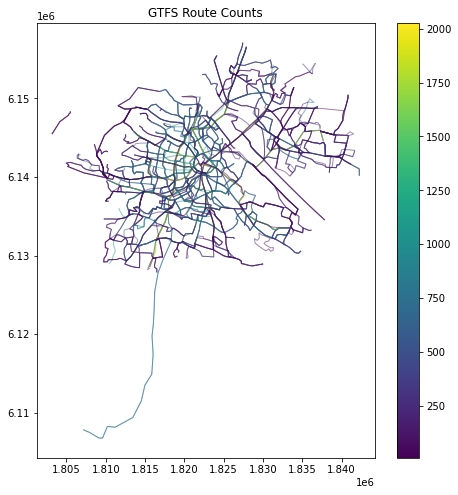

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf_plot = gdf_routes.to_crs(epsg=3857)
gdf_plot.plot(ax=ax, column='counts', cmap='viridis', linewidth=1, alpha=0.5, legend=True)
ax.set_title("GTFS Route Counts");

# Visualize Shapes

In [7]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 5.01 s, sys: 35.3 ms, total: 5.04 s
Wall time: 5.2 s


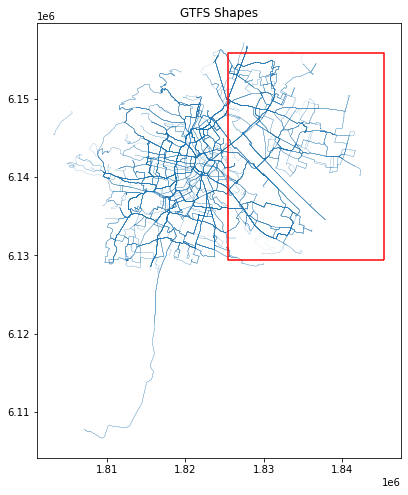

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS Shapes");

# Filter by Geometry (Within)

In [9]:
%%time
gtfsutils.filter.filter_by_geometry(
    df_dict, bounds, operation='within')

CPU times: user 5.48 s, sys: 61.6 ms, total: 5.54 s
Wall time: 5.91 s


In [10]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 892 ms, sys: 0 ns, total: 892 ms
Wall time: 904 ms


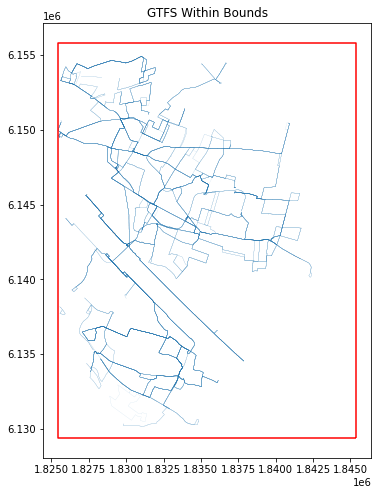

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS Within Bounds");

# Filter by Geometry (Intersects)

In [12]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 7.1 s, sys: 929 ms, total: 8.03 s
Wall time: 8.2 s


In [13]:
%%time
gtfsutils.filter.filter_by_geometry(
    df_dict, bounds, operation='intersects')

CPU times: user 5.43 s, sys: 131 ms, total: 5.56 s
Wall time: 5.89 s


In [14]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 1.97 s, sys: 5.05 ms, total: 1.98 s
Wall time: 2.01 s


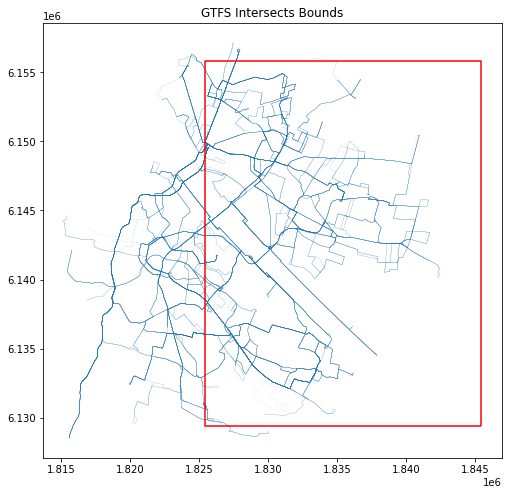

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS Intersects Bounds");

# Filter by Agency

In [17]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 7.95 s, sys: 1.18 s, total: 9.13 s
Wall time: 11.2 s


In [18]:
df_dict['agency']

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,3,WLB,https://www.wlb.at/,Europe/Vienna,DE,+43 (0) 1/ 90 444
1,4,Wiener Linien,https://www.wienerlinien.at/,Europe/Vienna,DE,+43 (0)1 7909 - 0


In [20]:
%%time
gtfsutils.filter.filter_by_agency_ids(df_dict, [4])

CPU times: user 752 ms, sys: 233 ms, total: 985 ms
Wall time: 1.04 s


In [22]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 4.8 s, sys: 456 µs, total: 4.8 s
Wall time: 4.89 s


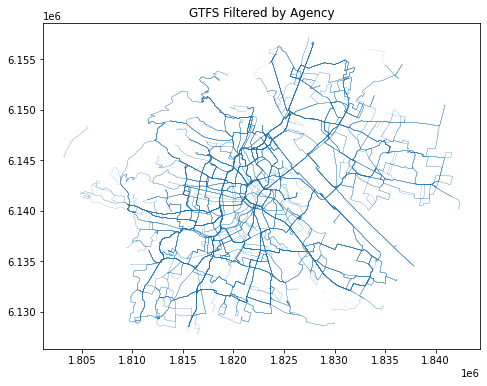

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
ax.set_title("GTFS Filtered by Agency");

# Save Filtered GTFS File

In [25]:
%%time
filepath = "data/vienna-filtered.gtfs.zip"
gtfsutils.save_gtfs(df_dict, filepath, ignore_required=True, overwrite=True)

CPU times: user 25.6 s, sys: 1.1 s, total: 26.7 s
Wall time: 47.9 s
